<a href="https://colab.research.google.com/github/jdexbarr/Neural-networks/blob/main/Convolutional_neuralNW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libreries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# now scale to the range [0,1]

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


# Now each image has a shape (height, width, channels)

x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

# Creation of labels even and odd

y_train_binary = (y_train % 2).astype("float32")
y_test_binary = (y_test % 2).astype("float32")

In [ ]:
# Definition of the model

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # This would give a binary output, even or odd
])

# compilation

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()   # It shows the layers, sizes, and number of parameters.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,345 (474.00 KB)

 Trainable params: 121,345 (474.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model

history = model.fit(
    x_train, y_train_binary,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# evaluation of the model

test_loss, test_accuracy = model.evaluate(x_test, y_test_binary, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.9087 - loss: 0.2208 - val_accuracy: 0.9760 - val_loss: 0.0731
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9810 - loss: 0.0567 - val_accuracy: 0.9883 - val_loss: 0.0382
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 78s 92ms/step - accuracy: 0.9875 - loss: 0.0369 - val_accuracy: 0.9883 - val_loss: 0.0322
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9896 - loss: 0.0294 - val_accuracy: 0.9888 - val_loss: 0.0348
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9905 - loss: 0.0261 - val_accuracy: 0.9918 - val_loss: 0.0257
Test Accuracy: 99.20%


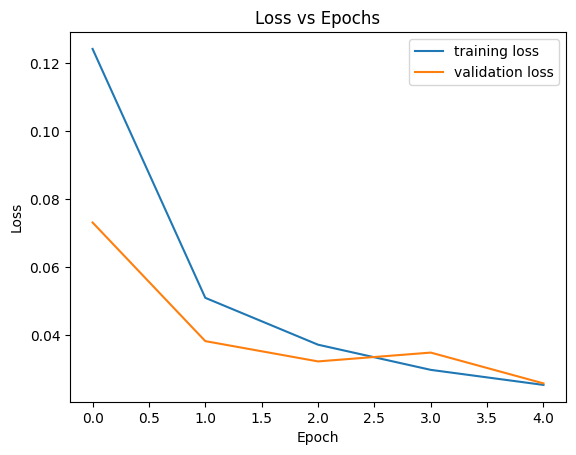

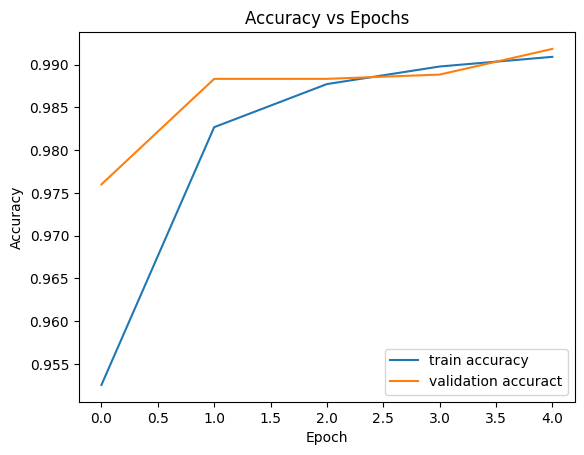

In [ ]:
# Graph of the accuracy and the loss

plt.figure()
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuract")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.show()

In [ ]:
# Sample to see if the model works in the right way
"""
Look at the digit (0–9)

Determine if it's even or odd

Round the image through the grid → it gets a value between 0 and 1

If < 0.5 → we consider it even, otherwise → odd
"""
idx = 0
sample_image = x_test[idx:idx+1]      # take an image from the test
sample_label = y_test[idx]
sample_label_parity = "EVEN" if sample_label % 2 == 0 else "ODD"

prediction = model.predict(sample_image)
prediction_class = "EVEN" if prediction[0,0] < 0.5 else "ODD"

print(f"\nReal digit choosen: {sample_label} ({sample_label_parity})")
print(f"Prediction: {prediction_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Real digit choosen: 7 (ODD)
Prediction: ODD
